<a href="https://colab.research.google.com/github/Amanr1996/IMDB_Sentiment_Analysis-/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis**

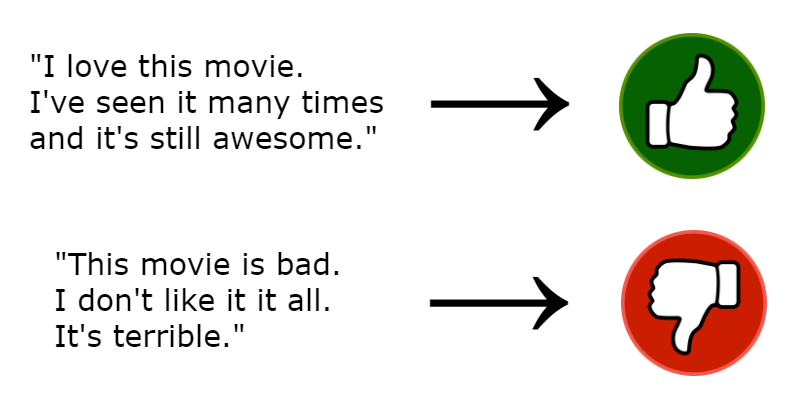

In [184]:
## Importing libraries 
import pandas as pd
import numpy as np


In [185]:
#Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [186]:
##Loading CSV file from google drive.
path = "/content/gdrive/MyDrive/IMDB Dataset.csv"
df = pd.read_csv(path)

In [187]:
## taking 10k data for module.
df = df.sample(10000)

In [188]:
## resetting index.
df.reset_index(drop=True, inplace=True)


In [189]:
df.shape

(10000, 2)

In [190]:
## checking for null values.
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [191]:
## Replacing  thw values from sentiment column with 0 and 1
df['sentiment'].replace({"positive":1, "negative":0}, inplace = True)

In [192]:
df.head()

,review,sentiment
0,From the excellent acting of an extremely impr...,1
1,I feel extremely sad for some of the people wh...,1
2,When the episode was made and aired Eisenhower...,1
3,Halloween is the story of a boy who was misund...,1
4,I know the people and I did some of the animat...,0


#**Cleaning and Processing Data**

In [193]:
## importing regular expression to remove HTML charector from the reviews
import re

In [194]:
## creating function
def clean_html(col):
  clean = re.compile("<.*?>")
  return re.sub(clean,"",col) 


In [195]:
## Appling function to the review column
df["review"] = df["review"].apply(clean_html)

In [196]:
df["review"][2]

'When the episode was made and aired Eisenhower was President. Kennedy was President-Elect.As for the episode, it was a passable episode, if not a bit earnest. "The Professor" shows not much range here, and the whole thing seems a little rushed (a lot of episodes of the TZ seem to not fit the time slot, some seeming like they\'re crammed in and rushed, some with little or nothing to it spread out over the half hour, and some, of course fit). I guess you just expect a little more tension than to be taken back to some rooms and drugged. But overall a decent episode. Indeed the "what if" motif of time travel is a nugget in itself and sets the table of with basic interest.7 out of 10, considering there were a lot of TZ episodes not quite as good, and some a great deal better.'

In [197]:
## creating function
def lower(col):
  return col.lower()


In [198]:
## Appling function to the review column
df["review"] = df["review"].apply(lower)

In [199]:
df["review"][2]


'when the episode was made and aired eisenhower was president. kennedy was president-elect.as for the episode, it was a passable episode, if not a bit earnest. "the professor" shows not much range here, and the whole thing seems a little rushed (a lot of episodes of the tz seem to not fit the time slot, some seeming like they\'re crammed in and rushed, some with little or nothing to it spread out over the half hour, and some, of course fit). i guess you just expect a little more tension than to be taken back to some rooms and drugged. but overall a decent episode. indeed the "what if" motif of time travel is a nugget in itself and sets the table of with basic interest.7 out of 10, considering there were a lot of tz episodes not quite as good, and some a great deal better.'

In [200]:
## creating function
def remove_spe(col):
  x = ''
  for i in col:
    if i.isalnum():
      x += i
    else :
      x += " "
  return x

In [201]:
## Appling function to the review column
df["review"] = df["review"].apply(remove_spe)

In [202]:
df["review"]

0       from the excellent acting of an extremely impr...
1       i feel extremely sad for some of the people wh...
2       when the episode was made and aired eisenhower...
3       halloween is the story of a boy who was misund...
4       i know the people and i did some of the animat...
                              ...                        
9995    chris  an adopted son of a moral family  a los...
9996    inferno starts off with a fairly impressive fo...
9997    this film show peoples in the middle of the ho...
9998    you could get into the nitty gritty of this fi...
9999    how would you feel if you had only a few weeks...
Name: review, Length: 10000, dtype: object

In [203]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Removing Stop Words**

In [204]:
## importing libraries for removing stop words
import nltk

In [205]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
from nltk.corpus import stopwords

In [207]:
Stop_words = stopwords.words("english")

In [208]:
def Stopword_remover (text):
  x = []
  for i in text.split():
    if i not in stopwords.words("english"):
      x.append(i)
  y = x[:]
  x.clear()
  return y

In [209]:
df["review"] = df["review"].apply(Stopword_remover)

In [210]:
df["review"][0]

['excellent',
 'acting',
 'extremely',
 'impressive',
 'cast',
 'intelligently',
 'written',
 'quotable',
 'script',
 'lavish',
 'cinematography',
 'beautiful',
 'music',
 'score',
 'carter',
 'burwell',
 'rob',
 'roy',
 'offers',
 'rarity',
 'movie',
 'going',
 'experiences',
 'one',
 'nigh',
 'impossible',
 'find',
 'fault',
 'area',
 'several',
 'comparisons',
 'made',
 'braveheart',
 'came',
 'year',
 'due',
 'credit',
 'mel',
 'gibson',
 'braveheart',
 'struck',
 'much',
 'self',
 'conscious',
 'preachy',
 'epic',
 'rival',
 'rob',
 'roy',
 'kind',
 'movie',
 'would',
 'care',
 'see',
 'braveheart',
 'works',
 'hard',
 'serious',
 'epic',
 'rob',
 'roy',
 'grabs',
 'absorbs',
 'tightly',
 'edited',
 'storytelling',
 'single',
 'scene',
 'wasted',
 'rob',
 'roy',
 'contains',
 'perfect',
 'balance',
 'dramatic',
 'tension',
 'action',
 'even',
 'occasional',
 'humor',
 'characters',
 'well',
 'fleshed',
 'perfectly',
 'conveying',
 'vernacular',
 'mannerisms',
 'anchor',
 'authenti

In [211]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [212]:
def stem (col):
  y = []
  for i in col:
    y.append(ps.stem(i))
  z = y[:]
  y.clear()
  return z


In [ ]:
df["review"] = df["review"].apply(stem)

In [ ]:
df.head

In [ ]:
def string_converter(col):
    return " ".join(col)

In [ ]:
df["review"] = df["review"].apply(string_converter)

In [ ]:
df["review"][0]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
x = cv.fit_transform(df["review"]).toarray()

In [ ]:
x

In [ ]:
x.shape

In [ ]:
y = df.iloc[:,-1].values

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 41)

In [ ]:
print(x_train.shape)
print(x_test.shape)

#**Implementing Models**

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [ ]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)

BernoulliNB()

In [ ]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)

In [ ]:
print(y_pred1)

[1 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

print("Gaussion",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernoulli",accuracy_score(y_test,y_pred3))

Gaussion 0.6435
Multinomial 0.8305
Bernoulli 0.8335
